## What is a z-test?

A z-test compares sample statistics to a population value (or compares two samples) when the sampling distribution is approximately normal and the population standard deviation(s) are known — or when sample sizes are large (so CLT applies). It uses the standard normal (z) distribution.

Use z-tests for:

* One-sample mean (σ known)

* Two-sample means (σ₁ and σ₂ known, or large n)

* Proportions (large samples)

## General steps for any z-test

1) State hypotheses (H₀ and H₁).

2) Compute the test statistic 𝑧

3) Choose significance level α (commonly 0.05).

4) Compute p-value or compare |z| to critical z (e.g., 1.96 for α=0.05 two-tailed).

5) Decision: reject H₀ if p < α (or |z| > z_crit).

6) Interpret in context.


### 1) One-sample z-test (mean)
A one-sample z-test checks whether the mean of a sample is significantly different from a known population mean when the population standard deviation σ is known (or sample size is large).
* When: population σ known.
  
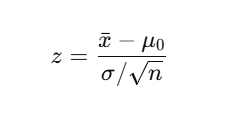

* xbar = sample mean
* μ0 = population mean
* σ = population SD
* n = sample size
* Two-tailed p-value: p=2×P(Z>∣z∣)

### 🔹When do we use a Z-test?

Use a z-test instead of a t-test when:

* ✔ Population standard deviation σ is known
* ✔ Sample size is large (n ≥ 30) → CLT makes z-approximation valid
* ✔ Data is continuous and approximately normal

### Step-by-Step Manual Calculation

* Let’s take an example.

📌 Given:

* Population mean to test (μ₀) = 160

* Population SD (σ) = 8

* Sample values: [150, 160, 165, 170, 155, 168, 172, 158]

####  Step 1 — Calculate sample size (n)

n=8

#### Step 2 — Calculate sample mean (x̄)
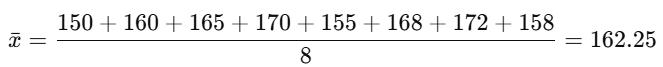

#### Step 3 — Compute Standard Error (SE)
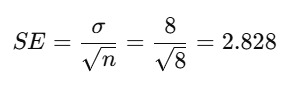

#### Step 4 — Compute Z-statistic
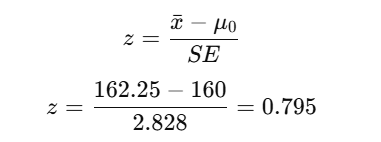

#### Step 5 — Compute p-value (two-tailed)
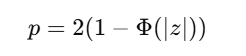

#### Step 6 — Decision

At α = 0.05:
* Since p > 0.05, we fail to reject H₀.

#### ⭐ Interpretation

* There is no significant difference between the sample mean (162.25) and the population mean (160).
* The difference could be due to random sampling variation.

Manual Z-Test Code

In [9]:
import numpy as np
import math
from scipy.stats import norm

# Sample data
data = np.array([150, 160, 165, 170, 155, 168, 172, 158])

mu0 = 160           # population mean
sigma = 8           # population SD
n = len(data)
xbar = data.mean()

# Standard Error
SE = sigma / math.sqrt(n)

# Z-statistic
z = (xbar - mu0) / SE

# Two-tailed p-value
p_value = 2 * norm.sf(abs(z))   # OR: 2*(1 - norm.cdf(abs(z)))

print("Sample Mean:", xbar)
print("Z-statistic:", z)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to Reject H0")

Sample Mean: 162.25
Z-statistic: 0.7954951288348661
p-value: 0.426325543384408
Fail to Reject H0


One-Sample Z-Test (with Critical Value)

In [11]:
import numpy as np
from scipy.stats import norm

# -----------------------------
# INPUTS
# -----------------------------
sample = np.array([150, 160, 165, 170, 155, 168, 172, 158])
mu_0 = 160               # population mean (hypothesized)
sigma = 8               # population standard deviation
alpha = 0.05            # significance level
# -----------------------------

# SAMPLE STATISTICS
n = len(sample)
sample_mean = np.mean(sample)

# STANDARD ERROR (for z-test)
se = sigma / np.sqrt(n)

# Z-STATISTIC
z = (sample_mean - mu_0) / se

# TWO-TAILED p-value
p_value = 2 * norm.sf(abs(z))   # sf = survival function = 1 - cdf

# CRITICAL VALUE (two-tailed)
z_critical = norm.ppf(1 - alpha/2)

# DECISION
if abs(z) > z_critical:
    decision = "Reject H0"
else:
    decision = "Fail to Reject H0"

# PRINT RESULTS
print("Sample Mean =", sample_mean)
print("Standard Error =", se)
print("Z-Statistic =", z)
print("p-value =", p_value)
print("Critical Value (±) =", z_critical)
print("Decision:", decision)


Sample Mean = 162.25
Standard Error = 2.82842712474619
Z-Statistic = 0.7954951288348661
p-value = 0.426325543384408
Critical Value (±) = 1.959963984540054
Decision: Fail to Reject H0


## What is the Two-Sample Z-Test?

It tests whether the means of two independent populations are different when the population standard deviations (σ₁, σ₂) are known (or when samples are large so z-approx is OK).
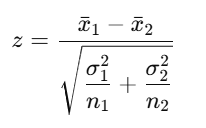


In [14]:
import numpy as np
import math
from scipy.stats import norm

# raw samples (example: we only need them to compute sample means)
group1 = np.random.normal(100, 15, size=100)  # placeholder; replace with real data
group2 = np.random.normal(95, 20, size=100)

print(group1)
print("-----------------------------------------------------------------")
print(group2)
print("-----------------------------------------------------------------")

# known population sigmas (must be provided)
sigma1 = 15.0
sigma2 = 20.0
alpha = 0.05

# compute sample means
xbar1 = group1.mean()
xbar2 = group2.mean()
n1 = len(group1)
n2 = len(group2)

se = math.sqrt((sigma1**2) / n1 + (sigma2**2) / n2)
z_stat = (xbar1 - xbar2) / se
p_value = 2 * norm.sf(abs(z_stat))
z_critical = norm.ppf(1 - alpha/2)

print("xbar1 =", xbar1)
print("xbar2 =", xbar2)
print("z =", z_stat)
print("p-value =", p_value)
print("Critical z (±) =", z_critical)
print("Decision:", "Reject H0" if abs(z_stat) > z_critical else "Fail to Reject H0")


[ 94.32364253 119.42708806  87.11695068 100.0718704  101.34064047
  95.2662345  101.43538921  88.09351719 104.57876359  64.41380953
 124.99643758 110.0851257  115.15841425 103.29560434 103.25551308
 102.70127857 113.0519366   94.03495501  88.11743459 133.38801732
  96.84390786 113.06033787  91.52373275 103.99756615  91.39616742
  97.52989287 105.38172426 122.89676078 101.58229078  99.3404374
  96.38211132 128.42527061  80.91535139  84.99782093  88.28877018
  91.83035679 106.80602056  99.1306057  120.96667628  90.78696816
  84.34133952  73.09079835  73.42789362  99.56027635  95.42615732
  75.77788295 110.28660304 119.91867927  67.3806059   87.44035793
 114.49971565  68.00513171 103.52647144 108.8467881  111.67144033
  86.609424    90.04418312  82.98721001  76.93654964 102.0617942
 101.71961564  89.44092124 120.42272339 109.93643112 104.41082588
  85.79776503 115.97705584 112.84902827  97.36867437 121.70867753
 115.74241379 115.04092618  95.19381438  81.98191056 107.57791221
 110.1205117